# Analyzing Tabular Data using Python and Pandas

We first download our database from my personal GitHub repository about this topic

In [1]:
from urllib.request import urlretrieve

In [2]:
india_covid_url= 'https://github.com/LorenzanaGauge/India_COVID_analysis/blob/main/COVID-19%20Cases(11-08-2021).csv'

urlretrieve(india_covid_url, 'india-covid-daywise.csv')

('india-covid-daywise.csv', <http.client.HTTPMessage at 0x7f47d11b7f10>)

To read the file, we can use the `read_csv` method from Pandas

In [3]:
import pandas as pd 

covid_df= pd.read_csv('COVID-19 Cases(11-08-2021).csv')

In [4]:
type(covid_df)

pandas.core.frame.DataFrame

In [5]:
covid_df

,date,region,confirmed_cases,active_cases,cured,deaths
0,12/03/2020,India,74,71.0,3.0,0.0
1,13/03/2020,India,75,71.0,3.0,1.0
2,14/03/2020,India,84,72.0,10.0,2.0
3,15/03/2020,India,107,95.0,10.0,2.0
4,16/03/2020,India,114,99.0,13.0,2.0
...,...,...,...,...,...,...
18576,02/08/2021,World,198234951,NaN,NaN,4227359.0
18577,03/08/2021,World,198778175,NaN,NaN,4235559.0
18578,04/08/2021,World,199466211,NaN,NaN,4244541.0
18579,05/08/2021,World,200174883,NaN,NaN,4255892.0


What we can tell by looking at the dataframe is the following:
- The file provides one day-wise coounts for COVID-19 in different regions of India and the World
- The metrics reported are confirmed cases, active cases, cured cases and deaths
- Data is provided for almost one and a half year: from March 12, 2020 to August 06, 2021

We must suppose that these are officially reported numbers. The actual number of cases & deaths may be higher, as not all cases are diagnosed

We can view some basic information about the data frame using the `.info` method

In [6]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18581 entries, 0 to 18580
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             18581 non-null  object 
 1   region           18581 non-null  object 
 2   confirmed_cases  18581 non-null  int64  
 3   active_cases     18071 non-null  float64
 4   cured            18070 non-null  float64
 5   deaths           18580 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 871.1+ KB


Each column contains values of a specific data type. You cna view statistical information for numerical columns using the `.describe` method

In [7]:
covid_df.describe()

,confirmed_cases,active_cases,cured,deaths
count,1.858100e+04,1.807100e+04,1.807000e+04,1.858000e+04
mean,2.602888e+06,3.597011e+04,5.228021e+05,5.470515e+04
std,1.630355e+07,1.786988e+05,2.264841e+06,3.537221e+05
min,0.000000e+00,-1.048000e+03,0.000000e+00,0.000000e+00
25%,4.477000e+03,3.470000e+02,3.267000e+03,3.600000e+01
50%,4.844700e+04,2.540000e+03,3.395000e+04,6.740000e+02
75%,3.389150e+05,1.449600e+04,2.934998e+05,4.363000e+03
max,2.008402e+08,3.745237e+06,3.113946e+07,4.265903e+06


The `columns` property contains the list of columns within the data frame

In [8]:
covid_df.columns

Index(['date', 'region', 'confirmed_cases', 'active_cases', 'cured', 'deaths'], dtype='object')

You can also retrieve the number of rows and columns in the data frame using the `.shape` method

In [9]:
covid_df.shape

(18581, 6)

In [10]:
import jovian

jovian.commit(project='india-pandas-analysis', filename="india_example.ipynb")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Updating notebook "lorenzanagauge/india-pandas-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/lorenzanagauge/india-pandas-analysis


'https://jovian.ai/lorenzanagauge/india-pandas-analysis'

# Retrieving data from a data frame

<font size=4>The first thing you might want to do is retrieve data from this data frame, e.g., the counts of a specific day or the list of values in a particular column. to do this, it might be helpful to understand the internal representation of data in a data frame. conceptually, you can think of a dataframe as a dictionary of list: **keys** are column names, and *values* are list/arrays containing data from the respective columns

<font size=4>With the dictionary of list analogy in mind, you can now guess how to retrieve data from a dataframe. For example, we can get a list of values from a speccific column using the [] indexing notation

In [11]:
covid_df['active_cases']

0        71.0
1        71.0
2        72.0
3        95.0
4        99.0
         ... 
18576     NaN
18577     NaN
18578     NaN
18579     NaN
18580     NaN
Name: active_cases, Length: 18581, dtype: float64

<font size=4>Each column is represented using a data structure called `Series`, which is essentially a numpy array with some extra methods and properties. 

In [12]:
type(covid_df['active_cases'])

pandas.core.series.Series

<font size=4>Like arrays, you can retrieve a specific value with a series using the indexing notation []

In [13]:
covid_df['active_cases'][246]

484547.0

In [14]:
covid_df['deaths'][240]

125562.0

<font size=4>Instead of using the indexing notation[], Pandas alos allows accesing columns as properties of the dataframe using the . notation. However, this method only works for columns whose names do not contain spaces or special characters.

In [15]:
covid_df.deaths

0              0.0
1              1.0
2              2.0
3              2.0
4              2.0
           ...    
18576    4227359.0
18577    4235559.0
18578    4244541.0
18579    4255892.0
18580    4265903.0
Name: deaths, Length: 18581, dtype: float64

<font size=4>Further, you can also pass a list of columns within the indexing notation [] to acces a sbset of the data frame with just the given columns

In [16]:
cases_df=covid_df[['date', 'confirmed_cases']]
cases_df

,date,confirmed_cases
0,12/03/2020,74
1,13/03/2020,75
2,14/03/2020,84
3,15/03/2020,107
4,16/03/2020,114
...,...,...
18576,02/08/2021,198234951
18577,03/08/2021,198778175
18578,04/08/2021,199466211
18579,05/08/2021,200174883


<font size=4>The new dataframe `cases_df` is simply a "view" of the orginal data frame `covid_df`. Both point to the same data in the computer's memory. Changing any values inside one of them will also change the respective values in the other: Sharing data between data frames makes data manipulation in Pandas blazing fast. You needn't to worry about the overhead of copying thousands of millions of rows every time you want to create a new data frame by operating on an existing one

<font size=4>You might need a full copy of the dataframe, in which case you can use the `copy` method

In [17]:
covid_df_copy=covid_df.copy()

<font size=4>The data within `covid_df_copy` is completely separate from `covid_df`, and changing values inside one of them will not affect the other

<font size=4>To acces a specific row of data, Pandas provides the `.loc` method

In [18]:
covid_df.loc[248]

date                15/11/2020
region                   India
confirmed_cases        8814579
active_cases            479216
cured              8.20573e+06
deaths                  129635
Name: 248, dtype: object

<font size=4>We can use the `.head` and `.tail` methods to view the first or last few rows of data

In [19]:
covid_df.head(5)

,date,region,confirmed_cases,active_cases,cured,deaths
0,12/03/2020,India,74,71.0,3.0,0.0
1,13/03/2020,India,75,71.0,3.0,1.0
2,14/03/2020,India,84,72.0,10.0,2.0
3,15/03/2020,India,107,95.0,10.0,2.0
4,16/03/2020,India,114,99.0,13.0,2.0


In [20]:
covid_df.tail(4)

,date,region,confirmed_cases,active_cases,cured,deaths
18577,03/08/2021,World,198778175,NaN,NaN,4235559.0
18578,04/08/2021,World,199466211,NaN,NaN,4244541.0
18579,05/08/2021,World,200174883,NaN,NaN,4255892.0
18580,06/08/2021,World,200840180,NaN,NaN,4265903.0


<font size=4>Notive above that while the first values in the `deaths` column are zero, the corresponding values within the `active_cases` and `cured` columns are `Nan`. This is because the CSV file does not contain any data for the `cured` and `active_cases` columns for specific dates. These values may be missing or unknown.  

In [21]:
covid_df.at[18577, 'cured']

nan

In [22]:
type(covid_df.at[18577, 'cured'])

numpy.float64

<font size=4> The distinctions between `0` and `NaN` is subtle but importatn, In this dataset, it represents that daily test numbers were not reported on specific dates. India started reporting daily test on March 03, 2020. We should look how many test before this date had been made.



<font size=4>We can find the first index that doesn't contain a `NaN` value usings a column's `first_valid_index` method

In [23]:
covid_df.deaths.first_valid_index()

0

<font size=4>Let's look at a few rows before and after this index to verify that the values change from `NaN` to actual numbers. We can do this by passing a rengo to `loc`

In [24]:
covid_df.loc[108:113]

,date,region,confirmed_cases,active_cases,cured,deaths
108,28/06/2020,India,528859,203051.0,309713.0,16095.0
109,29/06/2020,India,548318,210120.0,321723.0,16475.0
110,30/06/2020,India,566840,215125.0,334822.0,16893.0
111,01/07/2020,India,585493,220114.0,347979.0,17400.0
112,02/07/2020,India,604641,226947.0,359860.0,17834.0
113,03/07/2020,India,625544,227439.0,379892.0,18213.0


<font size=4>We can use the `.sample` method to retrieve a random sample of rows from the data frame

In [25]:
covid_df.sample(10)

,date,region,confirmed_cases,active_cases,cured,deaths
5064,27/09/2020,Goa,31574,5424.0,25759.0,391.0
9229,10/04/2021,Ladakh,10619,557.0,9932.0,130.0
10663,28/06/2021,Maharashtra,6036821,125422.0,5790113.0,121286.0
13551,13/07/2021,Puducherry,119057,1413.0,115873.0,1771.0
7192,15/02/2021,Jammu and Kashmir,125341,622.0,122768.0,1951.0
18271,28/09/2020,World,33517319,NaN,NaN,998734.0
7539,30/09/2020,Jharkhand,82540,11942.0,69898.0,700.0
6438,04/06/2020,Himachal Pradesh,359,204.0,150.0,5.0
12473,17/04/2021,Nagaland,12504,139.0,12271.0,94.0
5836,12/07/2021,Gujarat,824242,931.0,813238.0,10073.0


In [26]:
jovian.commit(filename='india_example.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "lorenzanagauge/india-pandas-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/lorenzanagauge/india-pandas-analysis


'https://jovian.ai/lorenzanagauge/india-pandas-analysis'

## Analyzing data from dataframes 

<font size=4>**Q: What are the total number of reported cases and deaths related to Covid-19 in India?**

In [27]:
covid_india_df=covid_df[covid_df.region=='India']
covid_india_df

,date,region,confirmed_cases,active_cases,cured,deaths
0,12/03/2020,India,74,71.0,3.0,0.0
1,13/03/2020,India,75,71.0,3.0,1.0
2,14/03/2020,India,84,72.0,10.0,2.0
3,15/03/2020,India,107,95.0,10.0,2.0
4,16/03/2020,India,114,99.0,13.0,2.0
...,...,...,...,...,...,...
497,05/08/2021,India,31812114,411076.0,30974748.0,426290.0
498,06/08/2021,India,31856757,414159.0,31015844.0,426754.0
499,07/08/2021,India,31895385,412153.0,31055861.0,427371.0
500,08/08/2021,India,31934455,406822.0,31099771.0,427862.0


In [28]:
total_cases_india=covid_india_df.confirmed_cases.sum()
total_deaths_india=covid_india_df.deaths.sum()

print('The number of confirmed cases is {} and the number of deaths is {}'.format(int(total_cases_india), int(total_deaths_india)))

The number of confirmed cases is 5117429016 and the number of deaths is 68904476


<font size=4>The previous answer is incorrect, because we get a total number of confirmed cases higher that the total population on Earth! This means, the table above shows cumulative sums

## Querying and sorting rows

<font size=4>Let's say we only want to look at the days which had more than 1,000,000 total reported cases. We can use a boolean expression to check which rows satisfy this criterion

In [29]:
high_new_cases=covid_df.confirmed_cases > 1000000

In [30]:
high_new_cases

0        False
1        False
2        False
3        False
4        False
         ...  
18576     True
18577     True
18578     True
18579     True
18580     True
Name: confirmed_cases, Length: 18581, dtype: bool

<font size=4>The boolean expression returns a series containing `True` and `False` boolean values. You can see this series to select a subset of rows from the original dataframe, corresponding to the `True` values in the series

In [31]:
covid_df[high_new_cases]

,date,region,confirmed_cases,active_cases,cured,deaths
127,17/07/2020,India,1003832,342473.0,635757.0,25602.0
128,18/07/2020,India,1038716,358692.0,653751.0,26273.0
129,19/07/2020,India,1077618,373379.0,677423.0,26816.0
130,20/07/2020,India,1118043,390459.0,700087.0,27497.0
131,21/07/2020,India,1155191,402529.0,724578.0,28084.0
...,...,...,...,...,...,...
18576,02/08/2021,World,198234951,NaN,NaN,4227359.0
18577,03/08/2021,World,198778175,NaN,NaN,4235559.0
18578,04/08/2021,World,199466211,NaN,NaN,4244541.0
18579,05/08/2021,World,200174883,NaN,NaN,4255892.0


<font size=4>We can write this succinctly on a single line y passing the boolean expression as an index to the dataframe

In [32]:
high_cases_df=covid_df[covid_df.confirmed_cases > 1000000]
high_cases_df

,date,region,confirmed_cases,active_cases,cured,deaths
127,17/07/2020,India,1003832,342473.0,635757.0,25602.0
128,18/07/2020,India,1038716,358692.0,653751.0,26273.0
129,19/07/2020,India,1077618,373379.0,677423.0,26816.0
130,20/07/2020,India,1118043,390459.0,700087.0,27497.0
131,21/07/2020,India,1155191,402529.0,724578.0,28084.0
...,...,...,...,...,...,...
18576,02/08/2021,World,198234951,NaN,NaN,4227359.0
18577,03/08/2021,World,198778175,NaN,NaN,4235559.0
18578,04/08/2021,World,199466211,NaN,NaN,4244541.0
18579,05/08/2021,World,200174883,NaN,NaN,4255892.0


<font size=4>We can change display options to view all rows at once

In [33]:
from IPython.display import display
with pd.option_context('display.max_rows',1000):
    display(covid_df[covid_df.confirmed_cases > 1000000])

,date,region,confirmed_cases,active_cases,cured,deaths
127,17/07/2020,India,1003832,342473.0,635757.0,25602.0
128,18/07/2020,India,1038716,358692.0,653751.0,26273.0
129,19/07/2020,India,1077618,373379.0,677423.0,26816.0
130,20/07/2020,India,1118043,390459.0,700087.0,27497.0
131,21/07/2020,India,1155191,402529.0,724578.0,28084.0
...,...,...,...,...,...,...
18576,02/08/2021,World,198234951,NaN,NaN,4227359.0
18577,03/08/2021,World,198778175,NaN,NaN,4235559.0
18578,04/08/2021,World,199466211,NaN,NaN,4244541.0
18579,05/08/2021,World,200174883,NaN,NaN,4255892.0


<font size=4>Let's create a dictionary with all the information corresponding to every single region in our database. First, we need to separate our data from region to region

In [34]:
covid_df.region

0        India
1        India
2        India
3        India
4        India
         ...  
18576    World
18577    World
18578    World
18579    World
18580    World
Name: region, Length: 18581, dtype: object

<font size=4>Now, lets get each different region our dataset contains

In [35]:
list_regions=['India']
for i in covid_df.region:
    if i !=list_regions[-1]:
        list_regions.append(i)



In [36]:
list_regions

['India',
 'Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'State assignment pending',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal',
 'World']

<font size=4>finally, let's create our dictionary with all the regions

In [37]:
regions_dic={}
for region in list_regions:
    regions_dic[region]=covid_df[covid_df.region==region].copy()


<font size=4>**REMEMBER**: Working with pandas is so easy, but we must be carful when we try to modify values. Notice that in our loop we make a copy, in order to establish new values later. You will have an error if you try to modify the original dataframe

In [38]:
regions_dic['Delhi']

,date,region,confirmed_cases,active_cases,cured,deaths
4377,12/03/2020,Delhi,6,6.0,0.0,0.0
4378,13/03/2020,Delhi,6,6.0,0.0,0.0
4379,14/03/2020,Delhi,7,5.0,1.0,1.0
4380,15/03/2020,Delhi,7,4.0,2.0,1.0
4381,16/03/2020,Delhi,7,4.0,2.0,1.0
...,...,...,...,...,...,...
4874,05/08/2021,Delhi,1436518,513.0,1410947.0,25058.0
4875,06/08/2021,Delhi,1436579,518.0,1411001.0,25060.0
4876,07/08/2021,Delhi,1436623,516.0,1411042.0,25065.0
4877,08/08/2021,Delhi,1436695,565.0,1411064.0,25066.0


In [39]:
regions_dic['West Bengal']

,date,region,confirmed_cases,active_cases,cured,deaths
17576,19/03/2020,West Bengal,1,1.0,0.0,0.0
17577,20/03/2020,West Bengal,1,1.0,0.0,0.0
17578,21/03/2020,West Bengal,2,2.0,0.0,0.0
17579,22/03/2020,West Bengal,4,4.0,0.0,0.0
17580,23/03/2020,West Bengal,7,7.0,0.0,0.0
...,...,...,...,...,...,...
18066,05/08/2021,West Bengal,1530850,10745.0,1501925.0,18180.0
18067,06/08/2021,West Bengal,1531662,10721.0,1502748.0,18193.0
18068,07/08/2021,West Bengal,1532379,10642.0,1503535.0,18202.0
18069,08/08/2021,West Bengal,1533128,10585.0,1504326.0,18217.0


In [40]:
regions_dic['India']

,date,region,confirmed_cases,active_cases,cured,deaths
0,12/03/2020,India,74,71.0,3.0,0.0
1,13/03/2020,India,75,71.0,3.0,1.0
2,14/03/2020,India,84,72.0,10.0,2.0
3,15/03/2020,India,107,95.0,10.0,2.0
4,16/03/2020,India,114,99.0,13.0,2.0
...,...,...,...,...,...,...
497,05/08/2021,India,31812114,411076.0,30974748.0,426290.0
498,06/08/2021,India,31856757,414159.0,31015844.0,426754.0
499,07/08/2021,India,31895385,412153.0,31055861.0,427371.0
500,08/08/2021,India,31934455,406822.0,31099771.0,427862.0


In [41]:
for data in covid_df.columns[2:]:
    print(data)

confirmed_cases
active_cases
cured
deaths


<font size=4>As we have already seen in our analysis, we get from the dataset cumulative sums. If we are interested in getting the data for each day, we need to manipulate our information. We will add some columns to get the results per day

In [42]:
for i in regions_dic.keys():
    #print(i)
    for data in covid_df.columns[2:]:
        #print(data)
        new_column=[]
        for index in regions_dic[i].index:
            #print(index)
            if index ==regions_dic[i].index[0]:
               new_column.append(regions_dic[i].loc[index][data])
            else:
               new_column.append(regions_dic[i].loc[index][data]-regions_dic[i].loc[index-1][data])
        regions_dic[i][data+'_per_day']=new_column 

<font size=4>Lets check our new dataframes

In [43]:
regions_dic['India']

,date,region,confirmed_cases,active_cases,cured,deaths,confirmed_cases_per_day,active_cases_per_day,cured_per_day,deaths_per_day
0,12/03/2020,India,74,71.0,3.0,0.0,74,71.0,3.0,0.0
1,13/03/2020,India,75,71.0,3.0,1.0,1,0.0,0.0,1.0
2,14/03/2020,India,84,72.0,10.0,2.0,9,1.0,7.0,1.0
3,15/03/2020,India,107,95.0,10.0,2.0,23,23.0,0.0,0.0
4,16/03/2020,India,114,99.0,13.0,2.0,7,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
497,05/08/2021,India,31812114,411076.0,30974748.0,426290.0,42982,723.0,41726.0,533.0
498,06/08/2021,India,31856757,414159.0,31015844.0,426754.0,44643,3083.0,41096.0,464.0
499,07/08/2021,India,31895385,412153.0,31055861.0,427371.0,38628,-2006.0,40017.0,617.0
500,08/08/2021,India,31934455,406822.0,31099771.0,427862.0,39070,-5331.0,43910.0,491.0


<font size=4>Now that we have the information per day for every region in our database, we can get interesting data, like the following one 

In [44]:
high_cases_india = regions_dic['India'][regions_dic['India'].confirmed_cases_per_day > 1000]
high_cases_india

,date,region,confirmed_cases,active_cases,cured,deaths,confirmed_cases_per_day,active_cases_per_day,cured_per_day,deaths_per_day
30,11/04/2020,India,7447,6565.0,643.0,239.0,1035,856.0,139.0,40.0
33,14/04/2020,India,10363,8988.0,1036.0,339.0,1211,1001.0,179.0,31.0
34,15/04/2020,India,11439,9756.0,1306.0,377.0,1076,768.0,270.0,38.0
36,17/04/2020,India,13387,11201.0,1749.0,437.0,1007,724.0,260.0,23.0
38,19/04/2020,India,15712,12974.0,2231.0,507.0,1334,1068.0,239.0,27.0
...,...,...,...,...,...,...,...,...,...,...
497,05/08/2021,India,31812114,411076.0,30974748.0,426290.0,42982,723.0,41726.0,533.0
498,06/08/2021,India,31856757,414159.0,31015844.0,426754.0,44643,3083.0,41096.0,464.0
499,07/08/2021,India,31895385,412153.0,31055861.0,427371.0,38628,-2006.0,40017.0,617.0
500,08/08/2021,India,31934455,406822.0,31099771.0,427862.0,39070,-5331.0,43910.0,491.0


**Q: What is the overall death rate (ratio of reported deaths to reported cases) in India?**

In [45]:
death_rate_india = regions_dic['India'].deaths_per_day.sum()/regions_dic['India'].confirmed_cases_per_day.sum()

In [46]:
death_rate_india

0.013397235416729094

<font size=4>We can also formulate more complex queries that involve multiple columns. As an example, let's try to determine the days when the ratio of deaths cases to confirmed cases is higher than the overall `death_rate_india`

In [47]:
high_death_ratio_india_df=regions_dic['India'][regions_dic['India'].deaths_per_day/regions_dic['India'].confirmed_cases_per_day > death_rate_india]

In [48]:
high_death_ratio_india_df

,date,region,confirmed_cases,active_cases,cured,deaths,confirmed_cases_per_day,active_cases_per_day,cured_per_day,deaths_per_day
1,13/03/2020,India,75,71.0,3.0,1.0,1,0.0,0.0,1.0
2,14/03/2020,India,84,72.0,10.0,2.0,9,1.0,7.0,1.0
5,17/03/2020,India,137,120.0,14.0,3.0,23,21.0,1.0,1.0
8,20/03/2020,India,195,171.0,20.0,4.0,29,23.0,5.0,1.0
10,22/03/2020,India,360,329.0,24.0,7.0,102,98.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
488,27/07/2021,India,31440951,398100.0,30621469.0,421382.0,29689,-13089.0,42363.0,415.0
489,28/07/2021,India,31484605,399436.0,30663147.0,422022.0,43654,1336.0,41678.0,640.0
490,29/07/2021,India,31528114,403840.0,30701612.0,422662.0,43509,4404.0,38465.0,640.0
495,03/08/2021,India,31726507,404958.0,30896354.0,425195.0,30549,-8760.0,38887.0,422.0


<font size=4>Notice that the result of performing an operation on two columns is a *new series*

In [49]:
regions_dic['India'].deaths_per_day/regions_dic['India'].confirmed_cases_per_day

0      0.000000
1      1.000000
2      0.111111
3      0.000000
4      0.000000
         ...   
497    0.012401
498    0.010394
499    0.015973
500    0.012567
501    0.012592
Length: 502, dtype: float64

<font size=4>We can use this series to add a new column to the data frame, as we didi it before for each region dataframe

In [50]:
for key in regions_dic.keys():
    regions_dic[key]['death_rate']=regions_dic[key].deaths_per_day /regions_dic[key].confirmed_cases_per_day

In [51]:
regions_dic['World']

,date,region,confirmed_cases,active_cases,cured,deaths,confirmed_cases_per_day,active_cases_per_day,cured_per_day,deaths_per_day,death_rate
18071,12/03/2020,World,129149,NaN,NaN,4724.0,129149,NaN,NaN,4724.0,0.036578
18072,13/03/2020,World,138704,NaN,NaN,5085.0,9555,NaN,NaN,361.0,0.037781
18073,14/03/2020,World,149469,NaN,NaN,5553.0,10765,NaN,NaN,468.0,0.043474
18074,15/03/2020,World,161291,NaN,NaN,6003.0,11822,NaN,NaN,450.0,0.038065
18075,16/03/2020,World,172460,NaN,NaN,6710.0,11169,NaN,NaN,707.0,0.063300
...,...,...,...,...,...,...,...,...,...,...,...
18576,02/08/2021,World,198234951,NaN,NaN,4227359.0,1681942,NaN,NaN,26947.0,0.016021
18577,03/08/2021,World,198778175,NaN,NaN,4235559.0,543224,NaN,NaN,8200.0,0.015095
18578,04/08/2021,World,199466211,NaN,NaN,4244541.0,688036,NaN,NaN,8982.0,0.013055
18579,05/08/2021,World,200174883,NaN,NaN,4255892.0,708672,NaN,NaN,11351.0,0.016017


<font size=4>Let's remove the `death_rate` column using the `drop` method

In [52]:
regions_dic['World'].drop(columns=['death_rate'], inplace=True)

<font size=4>The `inplace` argument allows us to modify the actual dataframe and doesn't make a copy

# Sorting rows using column values

<font size=4>The rows can also be sorted by a specific column using `.sort_values`. Let's sort to identify the days with the highest number of confirmed cases, then chain it with the `head` method to list just the first ten results

In [53]:
regions_dic['Delhi'].sort_values('confirmed_cases_per_day', ascending=False).head(10)

,date,region,confirmed_cases,active_cases,cured,deaths,confirmed_cases_per_day,active_cases_per_day,cured_per_day,deaths_per_day,death_rate
4774,21/04/2021,Delhi,905541,85575.0,807328.0,12638.0,28395,8688.0,19430.0,277.0,0.009755
4784,01/05/2021,Delhi,1149333,99361.0,1033825.0,16147.0,27047,1384.0,25288.0,375.0,0.013865
4776,23/04/2021,Delhi,956348,91618.0,851537.0,13193.0,26169,6254.0,19609.0,306.0,0.011693
4782,29/04/2021,Delhi,1098051,103424.0,979250.0,15377.0,25986,5160.0,20458.0,368.0,0.014161
4772,19/04/2021,Delhi,853460,74941.0,766398.0,12121.0,25462,5142.0,20159.0,161.0,0.006323
4785,02/05/2021,Delhi,1174552,96747.0,1061246.0,16559.0,25219,-2614.0,27421.0,412.0,0.016337
4775,22/04/2021,Delhi,930179,85364.0,831928.0,12887.0,24638,-211.0,24600.0,249.0,0.010106
4771,18/04/2021,Delhi,827998,69799.0,746239.0,11960.0,24375,8794.0,15414.0,167.0,0.006851
4777,24/04/2021,Delhi,980679,92029.0,875109.0,13541.0,24331,411.0,23572.0,348.0,0.014303
4783,30/04/2021,Delhi,1122286,97977.0,1008537.0,15772.0,24235,-5447.0,29287.0,395.0,0.016299


<font size=4>April was the hardest month for Delhi in sense of confirmed cases. We can compare what happened with deaths 

In [54]:
regions_dic['Delhi'].sort_values('deaths_per_day', ascending=False).head(10)

,date,region,confirmed_cases,active_cases,cured,deaths,confirmed_cases_per_day,active_cases_per_day,cured_per_day,deaths_per_day,death_rate
4799,16/05/2021,Delhi,1387411,66295.0,1299872.0,21244.0,14936,-11422.0,25732.0,626.0,0.041912
4787,04/05/2021,Delhi,1212989,89592.0,1105983.0,17414.0,18043,-2698.0,20293.0,448.0,0.024830
4474,17/06/2020,Delhi,44688,26351.0,16500.0,1837.0,1859,1349.0,73.0,437.0,0.235073
4785,02/05/2021,Delhi,1174552,96747.0,1061246.0,16559.0,25219,-2614.0,27421.0,412.0,0.016337
4786,03/05/2021,Delhi,1194946,92290.0,1085690.0,16966.0,20394,-4457.0,24444.0,407.0,0.019957
4783,30/04/2021,Delhi,1122286,97977.0,1008537.0,15772.0,24235,-5447.0,29287.0,395.0,0.016299
4781,28/04/2021,Delhi,1072065,98264.0,958792.0,15009.0,24149,5906.0,17862.0,381.0,0.015777
4780,27/04/2021,Delhi,1047916,92358.0,940930.0,14628.0,20201,-2234.0,22055.0,380.0,0.018811
4784,01/05/2021,Delhi,1149333,99361.0,1033825.0,16147.0,27047,1384.0,25288.0,375.0,0.013865
4782,29/04/2021,Delhi,1098051,103424.0,979250.0,15377.0,25986,5160.0,20458.0,368.0,0.014161


<font size=4>The big consequence of April's cases rise is the peak of deaths during the next month.

In [55]:
jovian.commit(filename='india_example.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "lorenzanagauge/india-pandas-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/lorenzanagauge/india-pandas-analysis


'https://jovian.ai/lorenzanagauge/india-pandas-analysis'

# Working with dates

<font size=4>While we have looked at overall numbers for the cases, tests, positive rate, etc., it would be useful to stude these numbers on a month-by-month basis. The `date` column might come in handy here, as Pandas provides manu utilities for working with date

In [56]:
regions_dic['West Bengal'].date

17576    19/03/2020
17577    20/03/2020
17578    21/03/2020
17579    22/03/2020
17580    23/03/2020
            ...    
18066    05/08/2021
18067    06/08/2021
18068    07/08/2021
18069    08/08/2021
18070    09/08/2021
Name: date, Length: 495, dtype: object

<font size=4>The data type is currently `object`, so Pandas does not know that this column is date. We can convert it into a `datetime` column using the `pd.to_datetime` method

In [57]:
regions_dic['West Bengal']['date']=pd.to_datetime(regions_dic['West Bengal'].date)

In [58]:
regions_dic['West Bengal']['date']

17576   2020-03-19
17577   2020-03-20
17578   2020-03-21
17579   2020-03-22
17580   2020-03-23
           ...    
18066   2021-05-08
18067   2021-06-08
18068   2021-07-08
18069   2021-08-08
18070   2021-09-08
Name: date, Length: 495, dtype: datetime64[ns]

<font size=4> You can see that it now has the datatype `datetime64`. We can now extract different parts of the data into separate columns, using the `DatetimeIndex` class

In [59]:
regions_dic['West Bengal']['year']= pd.DatetimeIndex(regions_dic['West Bengal'].date).year
regions_dic['West Bengal']['month']= pd.DatetimeIndex(regions_dic['West Bengal'].date).month
regions_dic['West Bengal']['day']= pd.DatetimeIndex(regions_dic['West Bengal'].date).day
regions_dic['West Bengal']['weekday']= pd.DatetimeIndex(regions_dic['West Bengal'].date).weekday

In [60]:
regions_dic['West Bengal']

,date,region,confirmed_cases,active_cases,cured,deaths,confirmed_cases_per_day,active_cases_per_day,cured_per_day,deaths_per_day,death_rate,year,month,day,weekday
17576,2020-03-19,West Bengal,1,1.0,0.0,0.0,1,1.0,0.0,0.0,0.000000,2020,3,19,3
17577,2020-03-20,West Bengal,1,1.0,0.0,0.0,0,0.0,0.0,0.0,NaN,2020,3,20,4
17578,2020-03-21,West Bengal,2,2.0,0.0,0.0,1,1.0,0.0,0.0,0.000000,2020,3,21,5
17579,2020-03-22,West Bengal,4,4.0,0.0,0.0,2,2.0,0.0,0.0,0.000000,2020,3,22,6
17580,2020-03-23,West Bengal,7,7.0,0.0,0.0,3,3.0,0.0,0.0,0.000000,2020,3,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18066,2021-05-08,West Bengal,1530850,10745.0,1501925.0,18180.0,826,-22.0,838.0,10.0,0.012107,2021,5,8,5
18067,2021-06-08,West Bengal,1531662,10721.0,1502748.0,18193.0,812,-24.0,823.0,13.0,0.016010,2021,6,8,1
18068,2021-07-08,West Bengal,1532379,10642.0,1503535.0,18202.0,717,-79.0,787.0,9.0,0.012552,2021,7,8,3
18069,2021-08-08,West Bengal,1533128,10585.0,1504326.0,18217.0,749,-57.0,791.0,15.0,0.020027,2021,8,8,6


<font size=4>Let's check the overall metrics for May. We can query the rows for May, choose a subset of columns, and use the `sum` method to aggregate each selected column's values.

In [61]:
# Query the rows for May
covid_df_may = regions_dic['West Bengal'][regions_dic['West Bengal'].month == 5]

# Extract the subset of columns to be aggregated
covid_df_may_metrics = covid_df_may[['confirmed_cases_per_day', 'active_cases_per_day', 'deaths_per_day']]

# Get the column-wise sum
covid_may_totals = covid_df_may_metrics.sum()

In [62]:
covid_may_totals

confirmed_cases_per_day    384695.0
active_cases_per_day       -38430.0
deaths_per_day               3627.0
dtype: float64

In [63]:
type(covid_may_totals)

pandas.core.series.Series

<font size=4>We can also combine the above operations into a single statement.

In [64]:
regions_dic['West Bengal'][regions_dic['West Bengal'].month == 5][['confirmed_cases_per_day', 'active_cases_per_day', 'deaths_per_day']].sum()

confirmed_cases_per_day    384695.0
active_cases_per_day       -38430.0
deaths_per_day               3627.0
dtype: float64

<font size=4>As another example, let's check if the number of cases reported on Sundays is higher tant the average number of cases reported every day. This time, we might want to aggregate columns using the `.mean` method

In [65]:
regions_dic['West Bengal'].confirmed_cases_per_day.mean()

3098.5919191919193

In [66]:
#Average on Sundays

regions_dic['West Bengal'][regions_dic['West Bengal'].weekday ==6].confirmed_cases_per_day.mean()

3549.9166666666665

<font size=4>It seems like more cases were reported on Sundays compared to other days

In [67]:
jovian.commit(filename='india_example.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "lorenzanagauge/india-pandas-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/lorenzanagauge/india-pandas-analysis


'https://jovian.ai/lorenzanagauge/india-pandas-analysis'

# Grouping and aggregation

<font size=4>As a next step, we might want to summarize the day-wise data and create a new dataframe with month-wise data. We can use the `groupby` function to create a group for each month, select the columns we wish to aggregate, and aggregate them using the `sum` method

In [68]:
covid_month_df = regions_dic['West Bengal'].groupby('month')[['confirmed_cases_per_day', 'active_cases_per_day', 'deaths_per_day']].sum()

In [69]:
covid_month_df

,confirmed_cases_per_day,active_cases_per_day,deaths_per_day
month,,,
1,56350,-6188.0,782.0
2,50475,-6059.0,623.0
3,59861,-4810.0,698.0
4,245500,80548.0,1446.0
5,384695,-38430.0,3627.0
6,102116,-737.0,1766.0
7,102769,-351.0,1439.0
8,105906,-5865.0,1626.0
9,105985,-883.0,1677.0


<font size=4>The result is a new data frame that uses unique values from the column passed to `groupby` as the index. Grouping and aggregation is a powerful method for progressively summarizing data into smaller data frames.

Instead of aggregating by sum, you can also aggregate by other measures like mean. Let's compute the average number of daily new cases, deaths, and tests for each month.

In [70]:
covid_month_mean_df = regions_dic['West Bengal'].groupby('month')[['confirmed_cases_per_day', 'active_cases_per_day', 'deaths_per_day']].mean()

In [71]:
covid_month_mean_df

,confirmed_cases_per_day,active_cases_per_day,deaths_per_day
month,,,
1,1657.352941,-182.000000,23.000000
2,1628.225806,-195.451613,20.096774
3,1247.104167,-100.208333,14.541667
4,4632.075472,1519.773585,27.283019
5,7258.396226,-725.094340,68.433962
6,1963.769231,-14.173077,33.961538
7,2015.078431,-6.882353,28.215686
8,2941.833333,-162.916667,45.166667
9,3028.142857,-25.228571,47.914286


<font size=4>Merging data from multiple sources

<font size=4>To determine other metrics like test per million, cases per million, etc., we require some more information about the country, viz. its population. Let's download another file `locations.csv` that contains health-related information for many countries, including India.

In [72]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x7f47785f3a60>)

In [73]:
locations_df=pd.read_csv('locations.csv')

In [74]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [75]:
locations_df[locations_df.location == "India"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
90,India,Asia,1.380004e+09,69.66,0.53,6426.674


<font size=4>We can merge this data into our existing data frame by adding more columns. However, to merge two data frames, we need at least one common column. That's why we separate the regions, and we have one for India

In [76]:
regions_dic['India']['date']=pd.to_datetime(regions_dic['India'].date)

In [77]:
regions_dic['India']['year']= pd.DatetimeIndex(regions_dic['India'].date).year
regions_dic['India']['month']= pd.DatetimeIndex(regions_dic['India'].date).month
regions_dic['India']['day']= pd.DatetimeIndex(regions_dic['India'].date).day
regions_dic['India']['weekday']= pd.DatetimeIndex(regions_dic['India'].date).weekday

In [78]:
regions_dic['India']['location']='India'

<font size=4>We can now add the columns from `locations_df` into `covid_df` using the `.merge` method.

In [79]:
merged_df=regions_dic['India'].merge(locations_df, on='location')

In [80]:
regions_dic['India']

,date,region,confirmed_cases,active_cases,cured,deaths,confirmed_cases_per_day,active_cases_per_day,cured_per_day,deaths_per_day,death_rate,year,month,day,weekday,location
0,2020-12-03,India,74,71.0,3.0,0.0,74,71.0,3.0,0.0,0.000000,2020,12,3,3,India
1,2020-03-13,India,75,71.0,3.0,1.0,1,0.0,0.0,1.0,1.000000,2020,3,13,4,India
2,2020-03-14,India,84,72.0,10.0,2.0,9,1.0,7.0,1.0,0.111111,2020,3,14,5,India
3,2020-03-15,India,107,95.0,10.0,2.0,23,23.0,0.0,0.0,0.000000,2020,3,15,6,India
4,2020-03-16,India,114,99.0,13.0,2.0,7,4.0,3.0,0.0,0.000000,2020,3,16,0,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2021-05-08,India,31812114,411076.0,30974748.0,426290.0,42982,723.0,41726.0,533.0,0.012401,2021,5,8,5,India
498,2021-06-08,India,31856757,414159.0,31015844.0,426754.0,44643,3083.0,41096.0,464.0,0.010394,2021,6,8,1,India
499,2021-07-08,India,31895385,412153.0,31055861.0,427371.0,38628,-2006.0,40017.0,617.0,0.015973,2021,7,8,3,India
500,2021-08-08,India,31934455,406822.0,31099771.0,427862.0,39070,-5331.0,43910.0,491.0,0.012567,2021,8,8,6,India


In [81]:
merged_df.drop(columns=['region'], inplace=True)

In [82]:
merged_df

,date,confirmed_cases,active_cases,cured,deaths,confirmed_cases_per_day,active_cases_per_day,cured_per_day,deaths_per_day,death_rate,year,month,day,weekday,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2020-12-03,74,71.0,3.0,0.0,74,71.0,3.0,0.0,0.000000,2020,12,3,3,India,Asia,1.380004e+09,69.66,0.53,6426.674
1,2020-03-13,75,71.0,3.0,1.0,1,0.0,0.0,1.0,1.000000,2020,3,13,4,India,Asia,1.380004e+09,69.66,0.53,6426.674
2,2020-03-14,84,72.0,10.0,2.0,9,1.0,7.0,1.0,0.111111,2020,3,14,5,India,Asia,1.380004e+09,69.66,0.53,6426.674
3,2020-03-15,107,95.0,10.0,2.0,23,23.0,0.0,0.0,0.000000,2020,3,15,6,India,Asia,1.380004e+09,69.66,0.53,6426.674
4,2020-03-16,114,99.0,13.0,2.0,7,4.0,3.0,0.0,0.000000,2020,3,16,0,India,Asia,1.380004e+09,69.66,0.53,6426.674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2021-05-08,31812114,411076.0,30974748.0,426290.0,42982,723.0,41726.0,533.0,0.012401,2021,5,8,5,India,Asia,1.380004e+09,69.66,0.53,6426.674
498,2021-06-08,31856757,414159.0,31015844.0,426754.0,44643,3083.0,41096.0,464.0,0.010394,2021,6,8,1,India,Asia,1.380004e+09,69.66,0.53,6426.674
499,2021-07-08,31895385,412153.0,31055861.0,427371.0,38628,-2006.0,40017.0,617.0,0.015973,2021,7,8,3,India,Asia,1.380004e+09,69.66,0.53,6426.674
500,2021-08-08,31934455,406822.0,31099771.0,427862.0,39070,-5331.0,43910.0,491.0,0.012567,2021,8,8,6,India,Asia,1.380004e+09,69.66,0.53,6426.674


<font size=4>we can now calculate metrics like cases per million, deaths per million, and tests per million

In [83]:
merged_df['cases_per_million'] = merged_df.confirmed_cases_per_day * 1e6 / merged_df.population

In [84]:
merged_df['deaths_per_million'] = merged_df.deaths_per_day * 1e6 / merged_df.population

In [85]:
merged_df['actives_per_million'] = merged_df.active_cases_per_day * 1e6 / merged_df.population

In [86]:
merged_df

,date,confirmed_cases,active_cases,cured,deaths,confirmed_cases_per_day,active_cases_per_day,cured_per_day,deaths_per_day,death_rate,...,weekday,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,actives_per_million
0,2020-12-03,74,71.0,3.0,0.0,74,71.0,3.0,0.0,0.000000,...,3,India,Asia,1.380004e+09,69.66,0.53,6426.674,0.053623,0.000000,0.051449
1,2020-03-13,75,71.0,3.0,1.0,1,0.0,0.0,1.0,1.000000,...,4,India,Asia,1.380004e+09,69.66,0.53,6426.674,0.000725,0.000725,0.000000
2,2020-03-14,84,72.0,10.0,2.0,9,1.0,7.0,1.0,0.111111,...,5,India,Asia,1.380004e+09,69.66,0.53,6426.674,0.006522,0.000725,0.000725
3,2020-03-15,107,95.0,10.0,2.0,23,23.0,0.0,0.0,0.000000,...,6,India,Asia,1.380004e+09,69.66,0.53,6426.674,0.016667,0.000000,0.016667
4,2020-03-16,114,99.0,13.0,2.0,7,4.0,3.0,0.0,0.000000,...,0,India,Asia,1.380004e+09,69.66,0.53,6426.674,0.005072,0.000000,0.002899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2021-05-08,31812114,411076.0,30974748.0,426290.0,42982,723.0,41726.0,533.0,0.012401,...,5,India,Asia,1.380004e+09,69.66,0.53,6426.674,31.146278,0.386231,0.523911
498,2021-06-08,31856757,414159.0,31015844.0,426754.0,44643,3083.0,41096.0,464.0,0.010394,...,1,India,Asia,1.380004e+09,69.66,0.53,6426.674,32.349897,0.336231,2.234051
499,2021-07-08,31895385,412153.0,31055861.0,427371.0,38628,-2006.0,40017.0,617.0,0.015973,...,3,India,Asia,1.380004e+09,69.66,0.53,6426.674,27.991215,0.447100,-1.453619
500,2021-08-08,31934455,406822.0,31099771.0,427862.0,39070,-5331.0,43910.0,491.0,0.012567,...,6,India,Asia,1.380004e+09,69.66,0.53,6426.674,28.311504,0.355796,-3.863031


In [87]:
jovian.commit(filename='india_example.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "lorenzanagauge/india-pandas-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/lorenzanagauge/india-pandas-analysis


'https://jovian.ai/lorenzanagauge/india-pandas-analysis'

# Writing data back to files

<font size=4>After completing your analysis and adding new columns, you should write the results back to a file. Otherwise, the data will be lost when the Jupyter notebook shuts down. Before writing to file, let us first create a data frame containing just the columns we wish to record.

In [88]:
result_df=merged_df[[
    'date',
    'confirmed_cases_per_day',
    'active_cases_per_day',
    'cured_per_day',
    'deaths_per_day',
    'hospital_beds_per_thousand',
    'cases_per_million',
    'deaths_per_million',
    'actives_per_million'
]]

In [89]:
result_df

,date,confirmed_cases_per_day,active_cases_per_day,cured_per_day,deaths_per_day,hospital_beds_per_thousand,cases_per_million,deaths_per_million,actives_per_million
0,2020-12-03,74,71.0,3.0,0.0,0.53,0.053623,0.000000,0.051449
1,2020-03-13,1,0.0,0.0,1.0,0.53,0.000725,0.000725,0.000000
2,2020-03-14,9,1.0,7.0,1.0,0.53,0.006522,0.000725,0.000725
3,2020-03-15,23,23.0,0.0,0.0,0.53,0.016667,0.000000,0.016667
4,2020-03-16,7,4.0,3.0,0.0,0.53,0.005072,0.000000,0.002899
...,...,...,...,...,...,...,...,...,...
497,2021-05-08,42982,723.0,41726.0,533.0,0.53,31.146278,0.386231,0.523911
498,2021-06-08,44643,3083.0,41096.0,464.0,0.53,32.349897,0.336231,2.234051
499,2021-07-08,38628,-2006.0,40017.0,617.0,0.53,27.991215,0.447100,-1.453619
500,2021-08-08,39070,-5331.0,43910.0,491.0,0.53,28.311504,0.355796,-3.863031


<font size=4>To write the data from the data frame into a file, we can use the `to_csv` function. 

In [90]:
result_df.to_csv('results.csv', index=None)

In [91]:
jovian.commit(filename='india_example.ipynb', outputs=['results.csv'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "lorenzanagauge/india-pandas-analysis" on https://jovian.ai/
[jovian] Uploading additional outputs...
[jovian] Committed successfully! https://jovian.ai/lorenzanagauge/india-pandas-analysis


'https://jovian.ai/lorenzanagauge/india-pandas-analysis'

<font size=4>You can find the CSV file in the "Files" tab on the project page.

# Bonus: Basic Plotting with Pandas

<font size=4>We generally use a library like `matplotlib` or `seaborn` plot graphs within a Jupyter notebook. However, Pandas dataframes & series provide a handy `.plot` method for quick and easy plotting.

Let's plot a line graph showing how the number of daily cases varies over time.

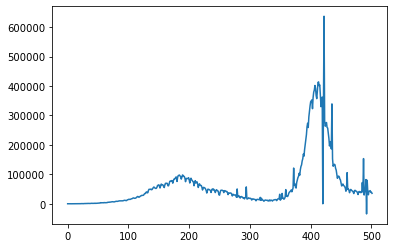

In [92]:
result_df.confirmed_cases_per_day.plot()

<font size=4>While this plot shows the overall trend, it's hard to tell where the peak occurred, as there are no dates on the X-axis. We can use the `date` column as the index for the data frame to address this issue.

In [93]:
result_df.set_index('date', inplace=True)

In [94]:
result_df

,confirmed_cases_per_day,active_cases_per_day,cured_per_day,deaths_per_day,hospital_beds_per_thousand,cases_per_million,deaths_per_million,actives_per_million
date,,,,,,,,
2020-12-03,74,71.0,3.0,0.0,0.53,0.053623,0.000000,0.051449
2020-03-13,1,0.0,0.0,1.0,0.53,0.000725,0.000725,0.000000
2020-03-14,9,1.0,7.0,1.0,0.53,0.006522,0.000725,0.000725
2020-03-15,23,23.0,0.0,0.0,0.53,0.016667,0.000000,0.016667
2020-03-16,7,4.0,3.0,0.0,0.53,0.005072,0.000000,0.002899
...,...,...,...,...,...,...,...,...
2021-05-08,42982,723.0,41726.0,533.0,0.53,31.146278,0.386231,0.523911
2021-06-08,44643,3083.0,41096.0,464.0,0.53,32.349897,0.336231,2.234051
2021-07-08,38628,-2006.0,40017.0,617.0,0.53,27.991215,0.447100,-1.453619


<font size=4>Notice that the index of a data frame doesn't have to be numeric. Using the date as the index also allows us to get the data for a specific data using `.loc`.

In [96]:
result_df.loc['2020-03-16']

,confirmed_cases_per_day,active_cases_per_day,cured_per_day,deaths_per_day,hospital_beds_per_thousand,cases_per_million,deaths_per_million,actives_per_million
date,,,,,,,,
2020-03-16,7,4.0,3.0,0.0,0.53,0.005072,0.0,0.002899


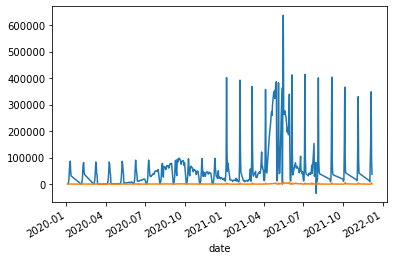

In [97]:
result_df.confirmed_cases_per_day.plot()
result_df.deaths_per_day.plot()

<font size=4>Let's see how the death rate and positive testing rates vary over time.

In [98]:
death_rate = result_df.deaths_per_day / result_df.confirmed_cases_per_day

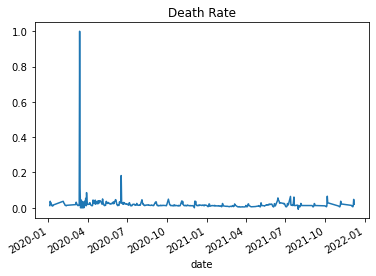

In [99]:
death_rate.plot(title='Death Rate')

<font size=4>Finally, let's plot some month-wise data using a bar chart to visualize the trend at a higher level.

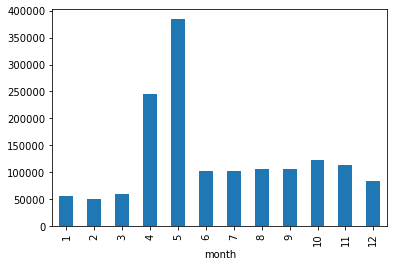

In [100]:
covid_month_df.confirmed_cases_per_day.plot(kind='bar')

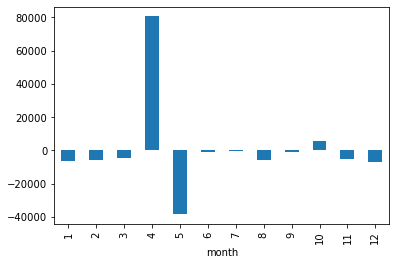

In [101]:
covid_month_df.active_cases_per_day.plot(kind='bar')

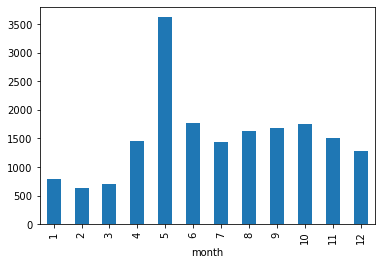

In [102]:
covid_month_df.deaths_per_day.plot(kind='bar')

In [103]:
jovian.commit(filename='india_example.ipynb')

<IPython.core.display.Javascript object>